In [211]:
#%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import math

In [212]:
def normalization(data):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    return data

In [213]:
df = pd.read_csv("new_dtrain.csv", delimiter=",")
zeros = df[df['latitude'] == 0]
df = df[df['latitude'] != 0]
subset = list(df.columns.values)
subset = subset.remove('price')
data = df.drop_duplicates(subset = subset)
#print(len(data[data.price > 1000000000]))
data = data[data.price < 1000000000]
data = data[data.price < 800000000]
data = shuffle(data)
data = data.reset_index(drop=True)

In [214]:
# data = log_feature(data)
#choosing data
X = data[['room_number', 'house_type',
       'built_time', 'appartments_floor', 'all_space', 'state', 'bathroom',
       'balcony', 'balcony_glassed', 'door', 'phone', 'ceiling', 'safety',
       'at_the_hotel', 'internet', 'furniture', 'parking', 'latitude',
       'longitude', 'building_floors', 'map_complex', 'floor',
          'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]
# X_geo = data[['geocode_lat', 'geocode_long', 'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]
y = data['price']
# x_columns = X.columns
# x_index = X.index
# X = normalization(X)
# X = pd.DataFrame(X, index=x_index, columns=x_columns)
# X = pd.concat([X, X_geo], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [215]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [216]:
model = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, 
                                  random_state=7, max_depth=10)
model2 = RandomForestRegressor(n_estimators = 300, random_state=7)

In [217]:
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=7,
           verbose=0, warm_start=False)

In [218]:
print(model.score(X_test, y_test))
print(model2.score(X_test, y_test))

0.874475009083
0.867680475546


In [219]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RFR Mean absolute error: ", mean_absolute_error(model2.predict(X_test), y_test))
#print("RFR Mean squared error: ", mean_squared_error(model2.predict(X_test), y_test))

RFR Mean absolute error:  3223629.66983


In [220]:
pred_ans = (model.predict(X_test) + 3*model2.predict(X_test)) / 4

In [221]:
print("Averaged Mean absolute error: ", mean_absolute_error(pred_ans, y_test))
print("Averaged Mean squared error: ", mean_squared_error(pred_ans, y_test))

Averaged Mean absolute error:  3179881.49088
Averaged Mean squared error:  1.40566077254e+14


In [222]:
# def scorer(clf, X, y):
#     return mean_absolute_error(clf.predict(X), y)

In [223]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
# print(scores)

In [224]:
# scores.mean()

In [225]:
# scores.std()

In [226]:
float((model2.predict(ax)[0] + 2*model.predict(ax)[0]) / 3)

30897282.414288163

In [227]:
model.predict(ax)[0]

30379390.288098913

In [228]:
float(a['price'])

33000000.0

In [229]:
abs(((model2.predict(ax)[0] + 2*model.predict(ax)[0]) / 3) - float(a['price']))

2102717.5857118368

In [230]:
# X_test.columns

In [231]:
predicted = pred_ans.copy()

In [232]:
actual = y_test.copy()
actual = actual.values

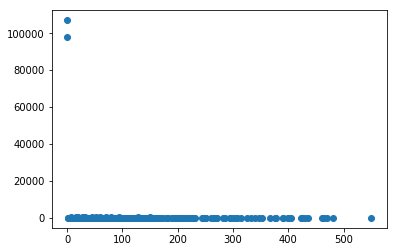

In [233]:
plt.scatter([x/1000000 for x in actual], ((predicted-actual)/actual)*100)

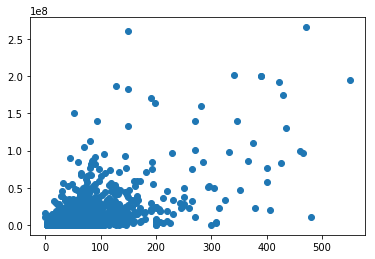

In [234]:
plt.scatter([x/1000000 for x in actual], (abs(predicted-actual)))